In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import os
import pycaret as pc
import pycaret.classification 

import sklearn.metrics as metrics
from sklearn.metrics import classification_report


/home/lothar/pycaret_2.3.5/env/lib/python3.7/site-packages/cudf/utils/gpu_utils.py:165: UserWarning: No NVIDIA GPU detected
  warnings.warn("No NVIDIA GPU detected")


In [3]:
import DataPrep
import DataPrep.MaEval
#import DataPrep.ConfusionMat
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pickle
import re
import bz2
import operator
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from operator import itemgetter  
from sklearn.metrics import confusion_matrix


In [4]:
def filter_ys(ys, sfilter, scmap, key2sc, sc2key):
    ysf = []
    for y in ys:
        if y != 0xffff and scmap[key2sc[y]] not in sfilter:
            ysf.append(y)
        else:
            ysf.append(sc2key[0xffff])
    return ysf

def filter_count(cnt, sfilter, scmap):
    cntf = {}
    for sc, c in cnt.items():
        if scmap[sc] not in sfilter:
            cntf[sc] =c
    return cntf

In [5]:
sc_filter = {
    'pr': {
        0: ['sys_lremovexattr', 'sys_chroot', 'sys_bpf', 'sys_statfs', 'sys_kcmp', 'sys_getresgid', 'sys_newlstat', 'sys_lchown', 'sys_setregid', 'sys_vhangup', 'sys_truncate', 'sys_removexattr', 'sys_setgid', 'sys_llistxattr', 'sys_shutdown', 'sys_setresgid', 'sys_setresuid', 'sys_setreuid', 'sys_listxattr', 'sys_getgroups', 'sys_getpeername', 'sys_fchmodat'],
        12: ['sys_iopl', 'sys_removexattr', 'sys_chroot', 'sys_truncate', 'sys_lchown', 'sys_sched_setattr', 'sys_tkill', 'sys_setregid', 'sys_statfs', 'sys_renameat2', 'sys_epoll_create1', 'sys_sendmmsg', 'sys_timerfd_gettime', 'sys_getresgid', 'sys_acct', 'sys_setgid', 'sys_bpf', 'sys_getitimer', 'sys_newlstat', 'sys_listxattr', 'sys_lgetxattr', 'sys_getpeername', 'sys_sethostname', 'sys_linkat', 'sys_kcmp', 'sys_sysfs', 'sys_mlockall', 'sys_setitimer', 'sys_setresgid', 'sys_mkdirat', 'sys_lsetxattr', 'sys_eventfd2', 'sys_getuid', 'sys_setreuid', 'sys_timer_create', 'sys_llistxattr', 'sys_vhangup', 'sys_setdomainname', 'sys_readv', 'sys_keyctl', 'sys_epoll_pwait', 'sys_sched_getattr', 'sys_shutdown', 'sys_sched_get_priority_min', 'sys_clock_settime', 'sys_unlinkat', 'sys_setresuid', 'sys_getdents64', 'sys_geteuid', 'sys_membarrier', 'sys_process_vm_writev', 'sys_fchownat', 'sys_sched_get_priority_max', 'sys_getgid', 'sys_mlock2', 'sys_fchmodat', 'sys_timerfd_create', 'sys_epoll_create', 'sys_connect', 'sys_getegid', 'sys_setuid', 'sys_chown', 'sys_rmdir', 'sys_getgroups', 'sys_preadv2', 'sys_mknodat', 'sys_mq_timedreceive', 'sys_preadv'],
    },
    'pw': {
        0: ['sys_fstatfs', 'sys_clock_adjtime', 'sys_getxattr', 'sys_vfork', 'sys_shmctl', 'sys_timerfd_create', 'sys_creat', 'sys_getgroups', 'sys_listxattr', 'sys_settimeofday', 'sys_getsockopt', 'sys_getsid', 'sys_lchown', 'sys_getresgid', 'sys_lremovexattr', 'sys_timer_getoverrun', 'sys_tkill', 'sys_mkdirat', 'sys_vhangup', 'sys_sysfs', 'sys_fdatasync', 'sys_process_vm_readv'],
        4: ['sys_fstatfs', 'sys_clock_adjtime', 'sys_getxattr', 'sys_vfork', 'sys_shmctl', 'sys_timerfd_create', 'sys_creat', 'sys_getgroups', 'sys_listxattr', 'sys_getsockopt', 'sys_getresgid', 'sys_getsid', 'sys_mkdirat', 'sys_lchown', 'sys_tkill', 'sys_timer_getoverrun', 'sys_process_vm_readv', 'sys_vhangup', 'sys_settimeofday'],
        12: [], #'sys_poll', 'sys_pread64', 'sys_readv', 'sys_sched_yield', 'sys_mremap', 'sys_msync', 'sys_mincore', 'sys_shmget', 'sys_shmctl', 'sys_dup', 'sys_getitimer', 'sys_setitimer', 'sys_sendfile64', 'sys_connect', 'sys_accept', 'sys_recvmsg', 'sys_shutdown', 'sys_listen', 'sys_getpeername', 'sys_socketpair', 'sys_setsockopt', 'sys_getsockopt', 'sys_exit', 'sys_newuname', 'sys_semget', 'sys_msgget', 'sys_msgsnd', 'sys_msgrcv', 'sys_msgctl', 'sys_fdatasync', 'sys_truncate', 'sys_ftruncate', 'sys_getcwd', 'sys_creat', 'sys_link', 'sys_unlink', 'sys_chown', 'sys_fchown', 'sys_lchown', 'sys_gettimeofday', 'sys_ptrace', 'sys_getuid', 'sys_syslog', 'sys_setreuid', 'sys_setregid', 'sys_getgroups', 'sys_getresgid', 'sys_getpgid', 'sys_setfsuid', 'sys_setfsgid', 'sys_getsid', 'sys_capget', 'sys_capset', 'sys_rt_sigpending', 'sys_rt_sigtimedwait', 'sys_rt_sigqueueinfo', 'sys_rt_sigsuspend', 'sys_sigaltstack', 'sys_utime', 'sys_mknod', 'sys_personality', 'sys_ustat', 'sys_sysfs', 'sys_getpriority', 'sys_sched_setparam', 'sys_sched_getparam', 'sys_sched_setscheduler', 'sys_sched_getscheduler', 'sys_sched_get_priority_max', 'sys_sched_get_priority_min', 'sys_sched_rr_get_interval', 'sys_mlock', 'sys_mlockall', 'sys_munlockall', 'sys_vhangup', 'sys_modify_ldt', 'sys_pivot_root', 'sys_sysctl', 'sys_adjtimex', 'sys_chroot', 'sys_sync', 'sys_acct', 'sys_settimeofday', 'sys_umount', 'sys_swapon', 'sys_swapoff', 'sys_sethostname', 'sys_setdomainname', 'sys_iopl', 'sys_ioperm', 'sys_delete_module', 'sys_readahead', 'sys_fsetxattr', 'sys_listxattr', 'sys_llistxattr', 'sys_flistxattr', 'sys_removexattr', 'sys_lremovexattr', 'sys_fremovexattr', 'sys_tkill', 'sys_sched_setaffinity', 'sys_sched_getaffinity', 'sys_epoll_create', 'sys_remap_file_pages', 'sys_getdents64', 'sys_restart_syscall', 'sys_semtimedop', 'sys_fadvise64', 'sys_timer_create', 'sys_timer_settime', 'sys_timer_gettime', 'sys_timer_getoverrun', 'sys_timer_delete', 'sys_clock_settime', 'sys_clock_getres', 'sys_clock_nanosleep', 'sys_utimes', 'sys_mq_unlink', 'sys_mq_timedsend', 'sys_mq_timedreceive', 'sys_mq_notify', 'sys_mq_getsetattr', 'sys_add_key', 'sys_keyctl', 'sys_ioprio_set', 'sys_ioprio_get', 'sys_mkdirat', 'sys_mknodat', 'sys_fchownat', 'sys_futimesat', 'sys_linkat', 'sys_symlinkat', 'sys_pselect6', 'sys_ppoll', 'sys_unshare', 'sys_get_robust_list', 'sys_splice', 'sys_tee', 'sys_sync_file_range', 'sys_vmsplice', 'sys_utimensat', 'sys_epoll_pwait', 'sys_timerfd_create', 'sys_fallocate', 'sys_timerfd_gettime', 'sys_accept4', 'sys_eventfd2', 'sys_dup3', 'sys_inotify_init1', 'sys_preadv', 'sys_pwritev', 'sys_rt_tgsigqueueinfo', 'sys_perf_event_open', 'sys_recvmmsg', 'sys_prlimit64', 'sys_name_to_handle_at', 'sys_open_by_handle_at', 'sys_syncfs', 'sys_sendmmsg', 'sys_setns', 'sys_process_vm_readv', 'sys_process_vm_writev', 'sys_kcmp', 'sys_sched_setattr', 'sys_sched_getattr', 'sys_renameat2', 'sys_memfd_create', 'sys_bpf', 'sys_execveat', 'sys_membarrier', 'sys_mlock2', 'sys_copy_file_range', 'sys_pwritev2', 'sys_statx', 'sys_symlink', 'sys_setresuid', 'sys_setsid', 'sys_setgid', 'sys_mq_open', 'sys_vfork', 'sys_pipe2', 'sys_gettid', 'sys_fstatfs', 'sys_setgroups', 'sys_fchmodat', 'sys_sendmsg', 'sys_fgetxattr', 'sys_lgetxattr', 'sys_setresgid', 'sys_kill', 'sys_pause', 'sys_rmdir', 'sys_epoll_ctl', 'sys_tgkill', 'sys_times', 'sys_clock_adjtime', 'sys_epoll_create1', 'sys_setuid', 'sys_recvfrom', 'sys_getrusage', 'sys_setxattr', 'sys_bind', 'sys_madvise', 'sys_timerfd_settime', 'sys_lsetxattr', 'sys_newlstat', 'sys_unlinkat', 'sys_preadv2', 'sys_newfstatat', 'sys_mkdir', 'sys_sendto', 'sys_getsockname', 'sys_getxattr', 'sys_signalfd4', 'sys_epoll_wait', 'sys_fchdir', 'sys_alarm', 'sys_sysinfo', 'sys_openat', 'sys_faccessat', 'sys_chmod', 'sys_getresuid', 'sys_getegid', 'sys_readlink', 'sys_rename', 'sys_fsync', 'sys_socket', 'sys_setrlimit', 'sys_prctl', 'sys_getdents', 'sys_fchmod', 'sys_setpgid', 'sys_getgid', 'sys_getpgrp', 'sys_writev', 'sys_select', 'sys_wait4', 'sys_geteuid', 'sys_chdir', 'sys_mount', 'sys_set_tid_address', 'sys_futex', 'sys_getppid', 'sys_statfs', 'sys_umask', 'sys_waitid', 'sys_pipe', 'sys_clock_gettime', 'sys_execve', 'sys_getrlimit', 'sys_fcntl', 'sys_set_robust_list', 'sys_ioctl', 'sys_arch_prctl', 'sys_clone', 'sys_getpid', 'sys_rt_sigreturn', 'sys_exit_group', 'sys_write', 'sys_munmap', 'sys_brk', 'sys_semop', 'sys_rt_sigprocmask', 'sys_dup2', 'sys_access', 'sys_lseek', 'sys_newfstat', 'sys_rt_sigaction', 'sys_open', 'sys_read', 'sys_newstat', 'sys_mprotect', 'sys_close', 'sys_mmap', 'sys_pwrite64', 'sys_nanosleep'],
    }
}

In [6]:
scmap_str = json.loads(open("./DataPrep/scmap.json", "r").read())
scmap = {int(k): v for k, v in scmap_str.items()}
scmap[0xffff] = "NOSC"

In [7]:
blurs = [0, 4, 12]
n_feat = 64
do_log = 0
step = 400000
typs = ['pw', 'pr']
#typ = 'pr'

#n_feats = [512, 256, 128, 64, 32]
n_feats = {
    'pr': {
        0: 128,
        12: 128,
    },
    'pw': {
        0: 512,
        4: 512,
        12: 512,
    }
}
#key = 'ssh_0_xxx'
#key2 = 'ssh_0'

#data_path = "./data/memaccess_dumps/%s_%s.dump" % (key, typ)
#anot_path = "./data/memaccess_dumps/%s_%s.annotations" % (key, typ)
#info_path = "./data/recordings/%s.info" % key2
#mae = DataPrep.MaEval.MaEval(data_path, anot_path, info_path, scmap)

In [8]:
keys = [
    "id",
    "ip",
    "ls",
    "ping",
    "ssh",
    "ssh-keygen",
    "cat",
    "curl",
    #"find",
]

--------------------------------------------------------------------------------
TYP: pw
................................................................................
KEY: id
[+] Loading Memory Access File ./data/memaccess_dumps/id_1_ta_1_ei_0_pw.dump
[+] do not decompress ./data/memaccess_dumps/id_1_ta_1_ei_0_pw.dump
[+] new index 0-79326
[+] sc table pa 6a00100
[+] text offset d400000
[+] Loading Annotation File: ./data/memaccess_dumps/id_1_ta_1_ei_0_pw.annotations
[+] Got 181 annotated features
********************************************************************************
BLR: 0, NFEAT: 512, pw, id
        :     BASE /     PRED
       0:       14 /       14     sys_read
       1:        1 /        1     sys_write
       2:       19 /       16 -   sys_open
       3:       25 /       25     sys_close
       5:       17 /       17     sys_newfstat
       8:        6 /        6     sys_lseek
       9:       31 /       31     sys_mmap
      10:       20 /       20     sys_mprotect
 

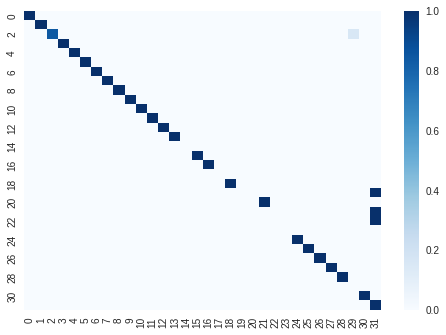

                     precision    recall  f1-score   support

           sys_read       1.00      1.00      1.00        14
          sys_write       1.00      1.00      1.00         1
           sys_open       1.00      0.84      0.91        19
          sys_close       1.00      1.00      1.00        25
       sys_newfstat       1.00      1.00      1.00        17
          sys_lseek       1.00      1.00      1.00         6
           sys_mmap       1.00      1.00      1.00        31
       sys_mprotect       1.00      1.00      1.00        20
         sys_munmap       1.00      1.00      1.00         6
            sys_brk       1.00      1.00      1.00         3
   sys_rt_sigaction       1.00      1.00      1.00         2
 sys_rt_sigprocmask       1.00      1.00      1.00         1
          sys_ioctl       1.00      1.00      1.00         1
         sys_access       1.00      1.00      1.00        13
         sys_getpid       0.00      0.00      0.00         0
         sys_socket    

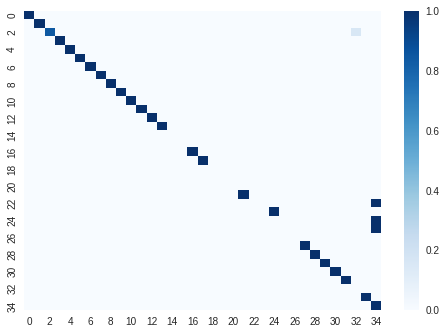

                     precision    recall  f1-score   support

           sys_read       1.00      1.00      1.00        14
          sys_write       1.00      1.00      1.00         1
           sys_open       1.00      0.84      0.91        19
          sys_close       1.00      1.00      1.00        25
       sys_newfstat       1.00      1.00      1.00        17
          sys_lseek       1.00      1.00      1.00         6
           sys_mmap       1.00      1.00      1.00        31
       sys_mprotect       1.00      1.00      1.00        20
         sys_munmap       1.00      1.00      1.00         6
            sys_brk       1.00      1.00      1.00         3
   sys_rt_sigaction       1.00      1.00      1.00         2
 sys_rt_sigprocmask       1.00      1.00      1.00         1
          sys_ioctl       1.00      1.00      1.00         1
         sys_access       1.00      1.00      1.00        13
        sys_mincore       0.00      0.00      0.00         0
         sys_getpid    

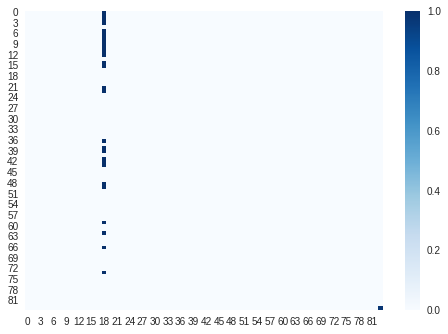

                       precision    recall  f1-score   support

             sys_read       0.00      0.00      0.00        14
            sys_write       0.00      0.00      0.00         1
             sys_open       0.00      0.00      0.00        19
            sys_close       0.00      0.00      0.00        25
          sys_newstat       0.00      0.00      0.00         0
         sys_newfstat       0.00      0.00      0.00        17
            sys_lseek       0.00      0.00      0.00         6
             sys_mmap       0.00      0.00      0.00        31
         sys_mprotect       0.00      0.00      0.00        20
           sys_munmap       0.00      0.00      0.00         6
              sys_brk       0.00      0.00      0.00         3
     sys_rt_sigaction       0.00      0.00      0.00         2
   sys_rt_sigprocmask       0.00      0.00      0.00         1
     sys_rt_sigreturn       0.00      0.00      0.00         0
            sys_ioctl       0.00      0.00      0.00  

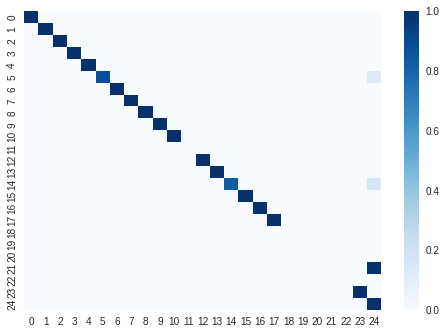

                 precision    recall  f1-score   support

       sys_read       1.00      1.00      1.00         4
      sys_write       1.00      1.00      1.00         8
       sys_open       1.00      1.00      1.00         4
      sys_close       1.00      1.00      1.00         4
   sys_newfstat       1.00      1.00      1.00         5
       sys_mmap       1.00      0.88      0.93         8
   sys_mprotect       1.00      1.00      1.00         6
     sys_munmap       1.00      1.00      1.00         1
        sys_brk       1.00      1.00      1.00         3
      sys_ioctl       1.00      1.00      1.00         1
     sys_access       1.00      1.00      1.00         4
     sys_getpid       0.00      0.00      0.00         0
     sys_socket       1.00      1.00      1.00         1
     sys_sendto       1.00      1.00      1.00         2
    sys_recvmsg       1.00      0.83      0.91         6
       sys_bind       1.00      1.00      1.00         1
sys_getsockname       1.00    

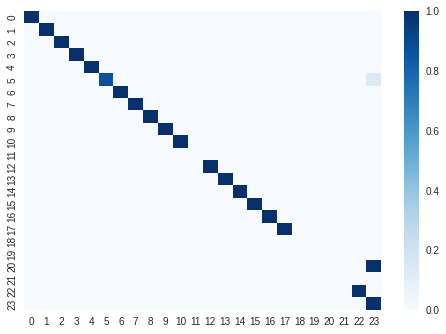

                 precision    recall  f1-score   support

       sys_read       1.00      1.00      1.00         4
      sys_write       1.00      1.00      1.00         8
       sys_open       1.00      1.00      1.00         4
      sys_close       1.00      1.00      1.00         4
   sys_newfstat       1.00      1.00      1.00         5
       sys_mmap       1.00      0.88      0.93         8
   sys_mprotect       1.00      1.00      1.00         6
     sys_munmap       1.00      1.00      1.00         1
        sys_brk       1.00      1.00      1.00         3
      sys_ioctl       1.00      1.00      1.00         1
     sys_access       1.00      1.00      1.00         4
     sys_getpid       0.00      0.00      0.00         0
     sys_socket       1.00      1.00      1.00         1
     sys_sendto       1.00      1.00      1.00         2
    sys_recvmsg       1.00      1.00      1.00         6
       sys_bind       1.00      1.00      1.00         1
sys_getsockname       1.00    

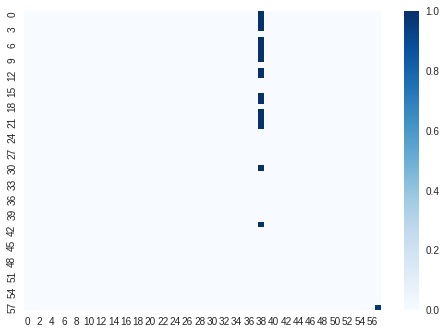

                       precision    recall  f1-score   support

             sys_read       0.00      0.00      0.00         4
            sys_write       0.00      0.00      0.00         8
             sys_open       0.00      0.00      0.00         4
            sys_close       0.00      0.00      0.00         4
          sys_newstat       0.00      0.00      0.00         0
         sys_newfstat       0.00      0.00      0.00         5
             sys_mmap       0.00      0.00      0.00         8
         sys_mprotect       0.00      0.00      0.00         6
           sys_munmap       0.00      0.00      0.00         1
              sys_brk       0.00      0.00      0.00         3
     sys_rt_sigaction       0.00      0.00      0.00         0
            sys_ioctl       0.00      0.00      0.00         1
           sys_access       0.00      0.00      0.00         4
           sys_select       0.00      0.00      0.00         0
          sys_madvise       0.00      0.00      0.00  

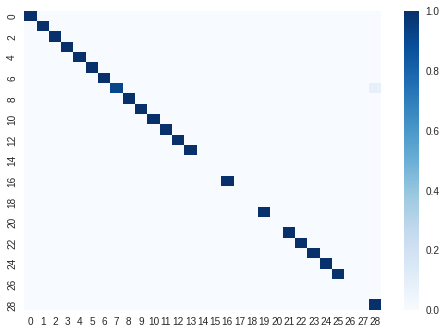

                       precision    recall  f1-score   support

             sys_read       1.00      1.00      1.00         5
            sys_write       1.00      1.00      1.00         6
             sys_open       1.00      1.00      1.00        26
            sys_close       1.00      1.00      1.00        27
          sys_newstat       1.00      1.00      1.00        20
         sys_newfstat       1.00      1.00      1.00        27
             sys_mmap       1.00      1.00      1.00        16
         sys_mprotect       1.00      0.92      0.96        12
           sys_munmap       1.00      1.00      1.00         1
              sys_brk       1.00      1.00      1.00         3
     sys_rt_sigaction       1.00      1.00      1.00         2
   sys_rt_sigprocmask       1.00      1.00      1.00         1
            sys_ioctl       1.00      1.00      1.00         3
           sys_access       1.00      1.00      1.00         8
           sys_getpid       0.00      0.00      0.00  

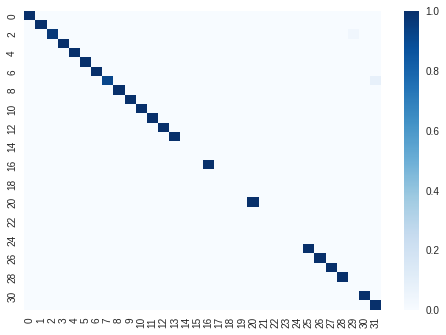

                     precision    recall  f1-score   support

           sys_read       1.00      1.00      1.00         5
          sys_write       1.00      1.00      1.00         6
           sys_open       1.00      0.96      0.98        26
          sys_close       1.00      1.00      1.00        27
        sys_newstat       1.00      1.00      1.00        20
       sys_newfstat       1.00      1.00      1.00        27
           sys_mmap       1.00      1.00      1.00        16
       sys_mprotect       1.00      0.92      0.96        12
         sys_munmap       1.00      1.00      1.00         1
            sys_brk       1.00      1.00      1.00         3
   sys_rt_sigaction       1.00      1.00      1.00         2
 sys_rt_sigprocmask       1.00      1.00      1.00         1
          sys_ioctl       1.00      1.00      1.00         3
         sys_access       1.00      1.00      1.00         8
        sys_mincore       0.00      0.00      0.00         0
         sys_getpid    

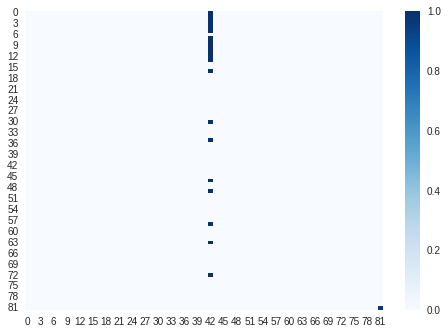

                       precision    recall  f1-score   support

             sys_read       0.00      0.00      0.00         5
            sys_write       0.00      0.00      0.00         6
             sys_open       0.00      0.00      0.00        26
            sys_close       0.00      0.00      0.00        27
          sys_newstat       0.00      0.00      0.00        20
         sys_newfstat       0.00      0.00      0.00        27
         sys_newlstat       0.00      0.00      0.00         0
             sys_mmap       0.00      0.00      0.00        16
         sys_mprotect       0.00      0.00      0.00        12
           sys_munmap       0.00      0.00      0.00         1
              sys_brk       0.00      0.00      0.00         3
     sys_rt_sigaction       0.00      0.00      0.00         2
   sys_rt_sigprocmask       0.00      0.00      0.00         1
            sys_ioctl       0.00      0.00      0.00         3
         sys_pwrite64       0.00      0.00      0.00  

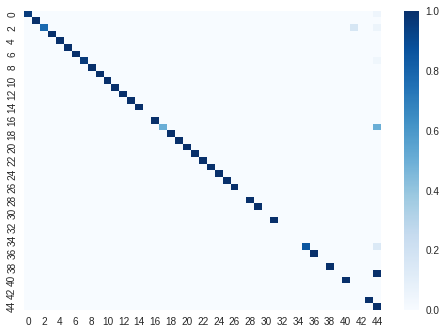

                            precision    recall  f1-score   support

                  sys_read       1.00      0.95      0.98        22
                 sys_write       1.00      1.00      1.00         3
                  sys_open       1.00      0.78      0.88        18
                 sys_close       1.00      1.00      1.00        26
               sys_newstat       1.00      1.00      1.00         3
              sys_newfstat       1.00      1.00      1.00        20
                  sys_poll       1.00      1.00      1.00         5
                  sys_mmap       1.00      0.96      0.98        24
              sys_mprotect       1.00      1.00      1.00        18
                sys_munmap       1.00      1.00      1.00         3
                   sys_brk       1.00      1.00      1.00         3
          sys_rt_sigaction       1.00      1.00      1.00         3
        sys_rt_sigprocmask       1.00      1.00      1.00         1
                 sys_ioctl       1.00      1.00

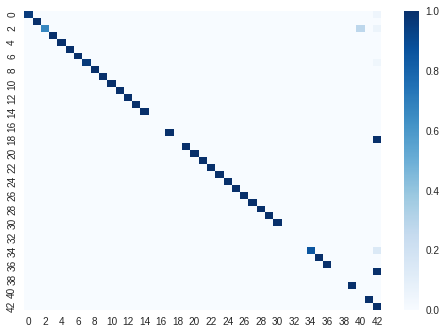

                    precision    recall  f1-score   support

          sys_read       1.00      0.95      0.98        22
         sys_write       1.00      1.00      1.00         3
          sys_open       1.00      0.67      0.80        18
         sys_close       1.00      1.00      1.00        26
       sys_newstat       1.00      1.00      1.00         3
      sys_newfstat       1.00      1.00      1.00        20
          sys_poll       1.00      1.00      1.00         5
          sys_mmap       1.00      0.96      0.98        24
      sys_mprotect       1.00      1.00      1.00        18
        sys_munmap       1.00      1.00      1.00         3
           sys_brk       1.00      1.00      1.00         3
  sys_rt_sigaction       1.00      1.00      1.00         3
sys_rt_sigprocmask       1.00      1.00      1.00         1
         sys_ioctl       1.00      1.00      1.00         5
        sys_access       1.00      1.00      1.00        10
       sys_mincore       0.00      0.00

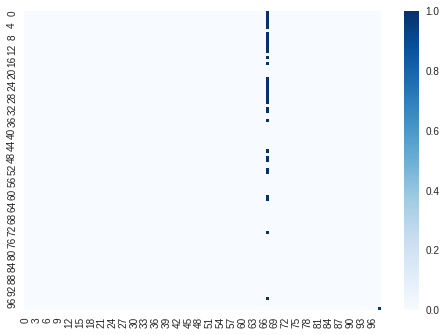

                        precision    recall  f1-score   support

              sys_read       0.00      0.00      0.00        22
             sys_write       0.00      0.00      0.00         3
              sys_open       0.00      0.00      0.00        18
             sys_close       0.00      0.00      0.00        26
           sys_newstat       0.00      0.00      0.00         3
          sys_newfstat       0.00      0.00      0.00        20
          sys_newlstat       0.00      0.00      0.00         0
              sys_poll       0.00      0.00      0.00         5
              sys_mmap       0.00      0.00      0.00        24
          sys_mprotect       0.00      0.00      0.00        18
            sys_munmap       0.00      0.00      0.00         3
               sys_brk       0.00      0.00      0.00         3
      sys_rt_sigaction       0.00      0.00      0.00         3
    sys_rt_sigprocmask       0.00      0.00      0.00         1
      sys_rt_sigreturn       0.00      

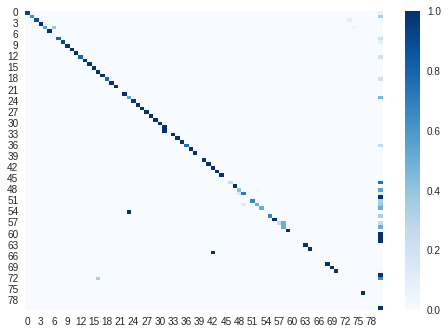

                     precision    recall  f1-score   support

           sys_read       0.93      0.93      0.93       255
          sys_write       0.63      0.63      0.63        49
           sys_open       1.00      0.87      0.93       150
          sys_close       0.99      0.99      0.99       225
        sys_newstat       1.00      0.56      0.71        18
       sys_newfstat       1.00      1.00      1.00       124
       sys_newlstat       0.00      0.00      0.00         0
           sys_poll       1.00      0.80      0.89        15
          sys_lseek       1.00      0.91      0.95        33
           sys_mmap       1.00      0.98      0.99       120
       sys_mprotect       1.00      1.00      1.00        84
         sys_munmap       1.00      1.00      1.00        19
            sys_brk       1.00      0.80      0.89         5
   sys_rt_sigaction       1.00      1.00      1.00        35
 sys_rt_sigprocmask       1.00      1.00      1.00        46
   sys_rt_sigreturn    

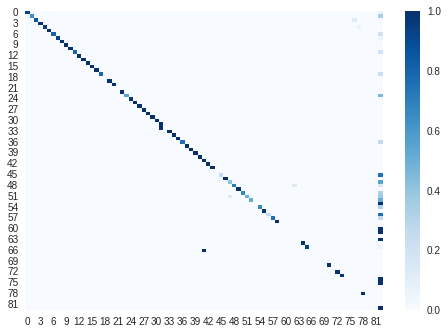

                            precision    recall  f1-score   support

                  sys_read       0.93      0.93      0.93       255
                 sys_write       0.63      0.63      0.63        49
                  sys_open       1.00      0.87      0.93       150
                 sys_close       0.99      0.98      0.99       225
               sys_newstat       1.00      0.94      0.97        18
              sys_newfstat       0.99      1.00      1.00       124
                  sys_poll       1.00      0.80      0.89        15
                 sys_lseek       1.00      0.94      0.97        33
                  sys_mmap       1.00      0.98      0.99       120
              sys_mprotect       1.00      1.00      1.00        84
                sys_munmap       1.00      1.00      1.00        19
                   sys_brk       1.00      0.80      0.89         5
          sys_rt_sigaction       1.00      1.00      1.00        35
        sys_rt_sigprocmask       1.00      1.00

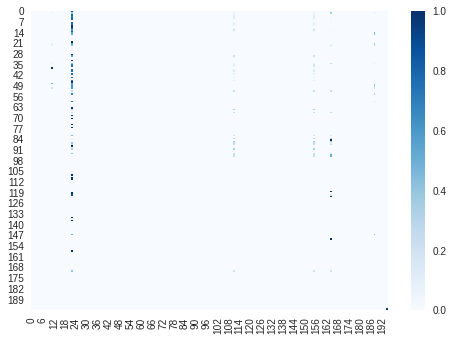

                            precision    recall  f1-score   support

                  sys_read       0.00      0.00      0.00       255
                 sys_write       0.00      0.00      0.00        49
                  sys_open       0.00      0.00      0.00       150
                 sys_close       0.00      0.00      0.00       225
               sys_newstat       0.00      0.00      0.00        18
              sys_newfstat       0.00      0.00      0.00       124
              sys_newlstat       0.00      0.00      0.00         0
                  sys_poll       0.00      0.00      0.00        15
                 sys_lseek       0.00      0.00      0.00        33
                  sys_mmap       0.00      0.00      0.00       120
              sys_mprotect       0.00      0.00      0.00        84
                sys_munmap       0.00      0.00      0.00        19
                   sys_brk       0.00      0.00      0.00         5
          sys_rt_sigaction       0.00      0.00

................................................................................
KEY: ssh-keygen
[+] Loading Memory Access File ./data/memaccess_dumps/ssh-keygen_1_ta_1_ei_0_pw.dump
[+] do not decompress ./data/memaccess_dumps/ssh-keygen_1_ta_1_ei_0_pw.dump
[+] new index 0-116753
[+] sc table pa 18a00100
[+] text offset 800000
[+] Loading Annotation File: ./data/memaccess_dumps/ssh-keygen_1_ta_1_ei_0_pw.annotations
[+] Got 243 annotated features
********************************************************************************
BLR: 0, NFEAT: 512, pw, ssh-keygen
        :     BASE /     PRED
       0:       15 /       15     sys_read
       1:        3 /        3     sys_write
       2:       18 /       16 -   sys_open
       3:       20 /       19 -   sys_close
       4:        1 /        1     sys_newstat
       5:       17 /       17     sys_newfstat
       7:        1 /        0 --- sys_poll
       8:        2 /        1 -   sys_lseek
       9:       27 /       27     sys_mmap
      1

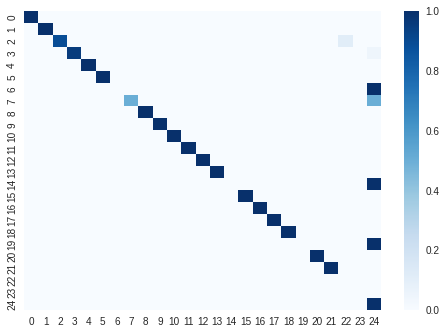

                precision    recall  f1-score   support

      sys_read       1.00      1.00      1.00        15
     sys_write       1.00      1.00      1.00         3
      sys_open       1.00      0.89      0.94        18
     sys_close       1.00      0.95      0.97        20
   sys_newstat       1.00      1.00      1.00         1
  sys_newfstat       1.00      1.00      1.00        17
      sys_poll       0.00      0.00      0.00         1
     sys_lseek       1.00      0.50      0.67         2
      sys_mmap       1.00      1.00      1.00        27
  sys_mprotect       1.00      1.00      1.00        18
    sys_munmap       1.00      1.00      1.00         4
       sys_brk       1.00      1.00      1.00         3
     sys_ioctl       1.00      1.00      1.00         1
    sys_access       1.00      1.00      1.00        10
    sys_getpid       0.00      0.00      0.00        94
    sys_socket       1.00      1.00      1.00         2
   sys_connect       1.00      1.00      1.00  

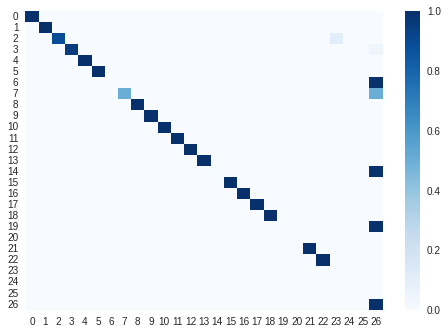

                     precision    recall  f1-score   support

           sys_read       1.00      1.00      1.00        15
          sys_write       1.00      1.00      1.00         3
           sys_open       1.00      0.89      0.94        18
          sys_close       1.00      0.95      0.97        20
        sys_newstat       1.00      1.00      1.00         1
       sys_newfstat       1.00      1.00      1.00        17
           sys_poll       0.00      0.00      0.00         1
          sys_lseek       1.00      0.50      0.67         2
           sys_mmap       1.00      1.00      1.00        27
       sys_mprotect       1.00      1.00      1.00        18
         sys_munmap       1.00      1.00      1.00         4
            sys_brk       1.00      1.00      1.00         3
          sys_ioctl       1.00      1.00      1.00         1
         sys_access       1.00      1.00      1.00        10
         sys_getpid       0.12      0.01      0.02        94
         sys_socket    

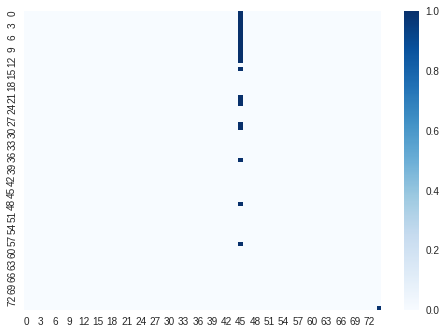

                        precision    recall  f1-score   support

              sys_read       0.00      0.00      0.00        15
             sys_write       0.00      0.00      0.00         3
              sys_open       0.00      0.00      0.00        18
             sys_close       0.00      0.00      0.00        20
           sys_newstat       0.00      0.00      0.00         1
          sys_newfstat       0.00      0.00      0.00        17
              sys_poll       0.00      0.00      0.00         1
             sys_lseek       0.00      0.00      0.00         2
              sys_mmap       0.00      0.00      0.00        27
          sys_mprotect       0.00      0.00      0.00        18
            sys_munmap       0.00      0.00      0.00         4
               sys_brk       0.00      0.00      0.00         3
             sys_ioctl       0.00      0.00      0.00         1
          sys_pwrite64       0.00      0.00      0.00         0
            sys_access       0.00      

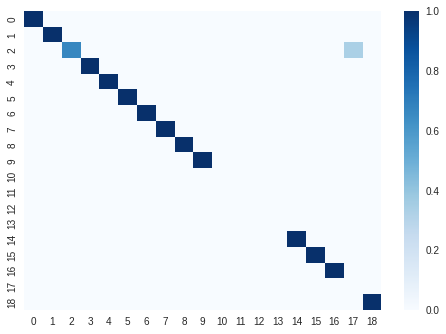

                precision    recall  f1-score   support

      sys_read       1.00      1.00      1.00         2
     sys_write       1.00      1.00      1.00         5
      sys_open       1.00      0.67      0.80         3
     sys_close       1.00      1.00      1.00         4
  sys_newfstat       1.00      1.00      1.00         4
      sys_mmap       1.00      1.00      1.00         6
  sys_mprotect       1.00      1.00      1.00         4
    sys_munmap       1.00      1.00      1.00         1
       sys_brk       1.00      1.00      1.00         3
    sys_access       1.00      1.00      1.00         3
    sys_getpid       0.00      0.00      0.00         0
    sys_getuid       0.00      0.00      0.00         0
   sys_geteuid       0.00      0.00      0.00         0
   sys_getppid       0.00      0.00      0.00         0
 sys_getgroups       1.00      1.00      1.00         1
sys_arch_prctl       1.00      1.00      1.00         1
 sys_fadvise64       1.00      1.00      1.00  

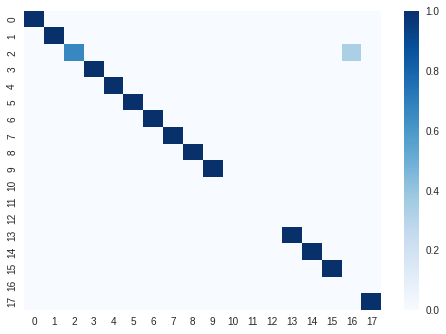

                precision    recall  f1-score   support

      sys_read       1.00      1.00      1.00         2
     sys_write       1.00      1.00      1.00         5
      sys_open       1.00      0.67      0.80         3
     sys_close       1.00      1.00      1.00         4
  sys_newfstat       1.00      1.00      1.00         4
      sys_mmap       1.00      1.00      1.00         6
  sys_mprotect       1.00      1.00      1.00         4
    sys_munmap       1.00      1.00      1.00         1
       sys_brk       1.00      1.00      1.00         3
    sys_access       1.00      1.00      1.00         3
    sys_getpid       0.00      0.00      0.00         0
     sys_umask       0.00      0.00      0.00         0
 sys_getgroups       0.00      0.00      0.00         0
 sys_setresgid       1.00      1.00      1.00         1
sys_arch_prctl       1.00      1.00      1.00         1
 sys_fadvise64       1.00      1.00      1.00         1
sys_exit_group       0.00      0.00      0.00  

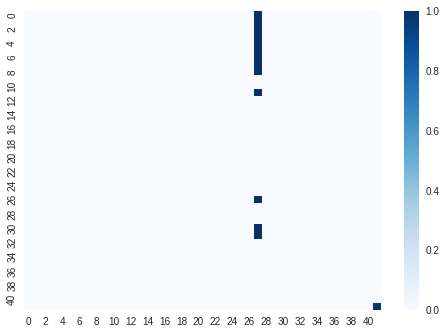

                    precision    recall  f1-score   support

          sys_read       0.00      0.00      0.00         2
         sys_write       0.00      0.00      0.00         5
          sys_open       0.00      0.00      0.00         3
         sys_close       0.00      0.00      0.00         4
      sys_newfstat       0.00      0.00      0.00         4
          sys_mmap       0.00      0.00      0.00         6
      sys_mprotect       0.00      0.00      0.00         4
        sys_munmap       0.00      0.00      0.00         1
           sys_brk       0.00      0.00      0.00         3
  sys_rt_sigaction       0.00      0.00      0.00         0
        sys_writev       0.00      0.00      0.00         0
        sys_access       0.00      0.00      0.00         3
          sys_pipe       0.00      0.00      0.00         0
          sys_dup2       0.00      0.00      0.00         0
     sys_setitimer       0.00      0.00      0.00         0
      sys_recvfrom       0.00      0.00

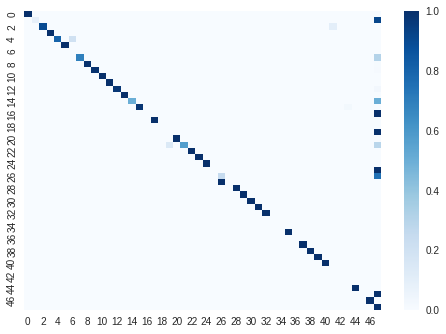

                     precision    recall  f1-score   support

           sys_read       1.00      1.00      1.00        51
          sys_write       1.00      0.08      0.15       441
           sys_open       1.00      0.90      0.95        51
          sys_close       1.00      1.00      1.00        54
        sys_newstat       1.00      0.80      0.89         5
       sys_newfstat       1.00      1.00      1.00        47
       sys_newlstat       0.00      0.00      0.00         0
           sys_poll       1.00      0.69      0.82        13
           sys_mmap       1.00      0.99      0.99        92
       sys_mprotect       1.00      0.99      0.99        74
         sys_munmap       1.00      1.00      1.00         5
            sys_brk       1.00      1.00      1.00         5
   sys_rt_sigaction       1.00      0.97      0.99        36
 sys_rt_sigprocmask       1.00      1.00      1.00         1
          sys_ioctl       1.00      0.50      0.67         4
         sys_access    

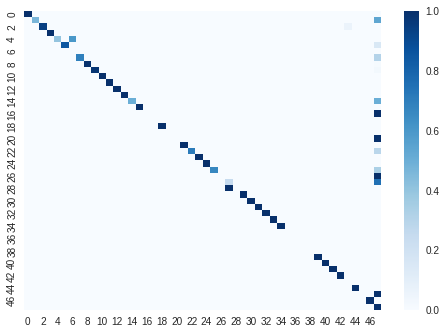

                     precision    recall  f1-score   support

           sys_read       1.00      1.00      1.00        51
          sys_write       1.00      0.46      0.63       441
           sys_open       1.00      0.94      0.97        51
          sys_close       1.00      1.00      1.00        54
        sys_newstat       1.00      0.40      0.57         5
       sys_newfstat       1.00      0.85      0.92        47
       sys_newlstat       0.00      0.00      0.00         0
           sys_poll       1.00      0.69      0.82        13
           sys_mmap       1.00      0.99      0.99        92
       sys_mprotect       1.00      0.97      0.99        74
         sys_munmap       1.00      1.00      1.00         5
            sys_brk       1.00      1.00      1.00         5
   sys_rt_sigaction       1.00      1.00      1.00        36
 sys_rt_sigprocmask       1.00      1.00      1.00         1
          sys_ioctl       1.00      0.50      0.67         4
         sys_access    

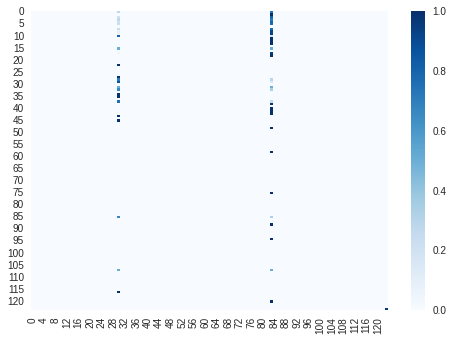

                           precision    recall  f1-score   support

                 sys_read       0.00      0.00      0.00        51
                sys_write       0.00      0.00      0.00       441
                 sys_open       0.00      0.00      0.00        51
                sys_close       0.00      0.00      0.00        54
              sys_newstat       0.00      0.00      0.00         5
             sys_newfstat       0.00      0.00      0.00        47
             sys_newlstat       0.00      0.00      0.00         0
                 sys_poll       0.00      0.00      0.00        13
                 sys_mmap       0.00      0.00      0.00        92
             sys_mprotect       0.00      0.00      0.00        74
               sys_munmap       0.00      0.00      0.00         5
                  sys_brk       0.00      0.00      0.00         5
         sys_rt_sigaction       0.00      0.00      0.00        36
       sys_rt_sigprocmask       0.00      0.00      0.00     

--------------------------------------------------------------------------------
TYP: pr
................................................................................
KEY: id
[+] Loading Memory Access File ./data/memaccess_dumps/id_1_ta_1_ei_0_pr.dump
[+] do not decompress ./data/memaccess_dumps/id_1_ta_1_ei_0_pr.dump
[+] new index 0-86403
[+] sc table pa 6a00100
[+] text offset d400000
[+] Loading Annotation File: ./data/memaccess_dumps/id_1_ta_1_ei_0_pr.annotations
[+] Got 181 annotated features
********************************************************************************
BLR: 0, NFEAT: 128, pr, id
        :     BASE /     PRED
       0:       14 /       14     sys_read
       1:        1 /        1     sys_write
       2:       19 /       19     sys_open
       3:       25 /       25     sys_close
       5:       17 /       17     sys_newfstat
       8:        6 /        6     sys_lseek
       9:       31 /       31     sys_mmap
      10:       20 /       20     sys_mprotect
 

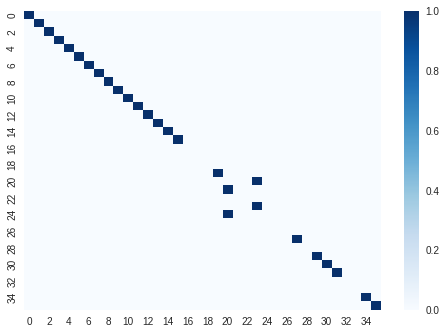

                            precision    recall  f1-score   support

                  sys_read       1.00      1.00      1.00        14
                 sys_write       1.00      1.00      1.00         1
                  sys_open       1.00      1.00      1.00        19
                 sys_close       1.00      1.00      1.00        25
              sys_newfstat       1.00      1.00      1.00        17
                 sys_lseek       1.00      1.00      1.00         6
                  sys_mmap       1.00      1.00      1.00        31
              sys_mprotect       1.00      1.00      1.00        20
                sys_munmap       1.00      1.00      1.00         6
                   sys_brk       1.00      1.00      1.00         3
          sys_rt_sigaction       1.00      1.00      1.00         2
        sys_rt_sigprocmask       1.00      1.00      1.00         1
                 sys_ioctl       1.00      1.00      1.00         1
                sys_access       1.00      1.00

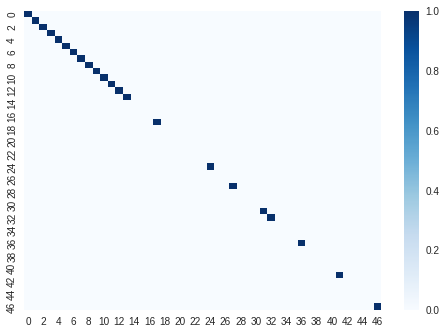

                            precision    recall  f1-score   support

                  sys_read       1.00      1.00      1.00        14
                 sys_write       0.50      1.00      0.67         1
                  sys_open       1.00      1.00      1.00        19
                 sys_close       0.62      1.00      0.77        25
              sys_newfstat       1.00      1.00      1.00        17
                 sys_lseek       0.22      1.00      0.36         6
                  sys_mmap       0.91      1.00      0.95        31
              sys_mprotect       1.00      1.00      1.00        20
                sys_munmap       1.00      1.00      1.00         6
                   sys_brk       0.75      1.00      0.86         3
          sys_rt_sigaction       0.50      1.00      0.67         2
        sys_rt_sigprocmask       0.25      1.00      0.40         1
                 sys_ioctl       1.00      1.00      1.00         1
                sys_access       1.00      1.00

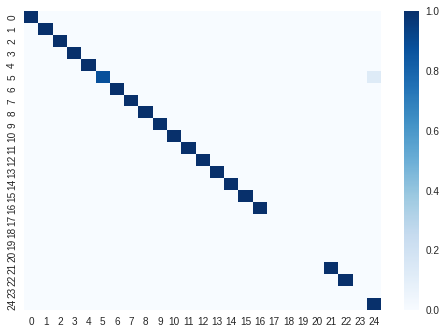

                 precision    recall  f1-score   support

       sys_read       1.00      1.00      1.00         4
      sys_write       1.00      1.00      1.00         8
       sys_open       1.00      1.00      1.00         4
      sys_close       1.00      1.00      1.00         4
   sys_newfstat       1.00      1.00      1.00         5
       sys_mmap       1.00      0.88      0.93         8
   sys_mprotect       1.00      1.00      1.00         6
     sys_munmap       1.00      1.00      1.00         1
        sys_brk       1.00      1.00      1.00         3
      sys_ioctl       1.00      1.00      1.00         1
     sys_access       1.00      1.00      1.00         4
     sys_socket       1.00      1.00      1.00         1
     sys_sendto       1.00      1.00      1.00         2
    sys_recvmsg       1.00      1.00      1.00         6
       sys_bind       1.00      1.00      1.00         1
sys_getsockname       1.00      1.00      1.00         1
 sys_setsockopt       1.00    

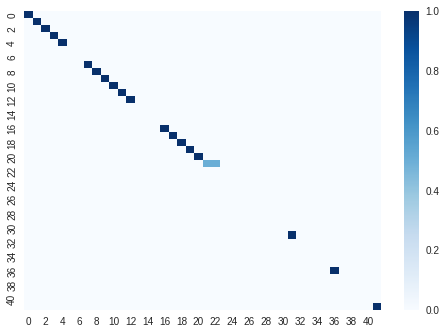

                            precision    recall  f1-score   support

                  sys_read       0.80      1.00      0.89         4
                 sys_write       0.67      1.00      0.80         8
                  sys_open       1.00      1.00      1.00         4
                 sys_close       1.00      1.00      1.00         4
              sys_newfstat       1.00      1.00      1.00         5
                  sys_poll       0.00      0.00      0.00         0
                 sys_lseek       0.00      0.00      0.00         0
                  sys_mmap       1.00      1.00      1.00         8
              sys_mprotect       1.00      1.00      1.00         6
                sys_munmap       1.00      1.00      1.00         1
                   sys_brk       0.75      1.00      0.86         3
                 sys_ioctl       0.50      1.00      0.67         1
                sys_access       0.40      1.00      0.57         4
                  sys_pipe       0.00      0.00

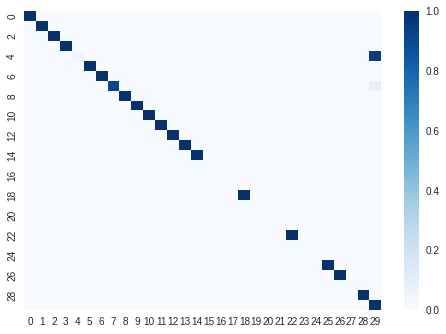

                     precision    recall  f1-score   support

           sys_read       1.00      1.00      1.00         5
          sys_write       1.00      1.00      1.00         6
           sys_open       1.00      1.00      1.00        26
          sys_close       1.00      1.00      1.00        27
        sys_newstat       1.00      0.05      0.10        20
       sys_newfstat       1.00      1.00      1.00        27
           sys_mmap       1.00      1.00      1.00        16
       sys_mprotect       1.00      0.92      0.96        12
         sys_munmap       1.00      1.00      1.00         1
            sys_brk       1.00      1.00      1.00         3
   sys_rt_sigaction       1.00      1.00      1.00         2
 sys_rt_sigprocmask       1.00      1.00      1.00         1
          sys_ioctl       1.00      1.00      1.00         3
         sys_access       1.00      1.00      1.00         8
       sys_getdents       1.00      1.00      1.00        40
          sys_chdir    

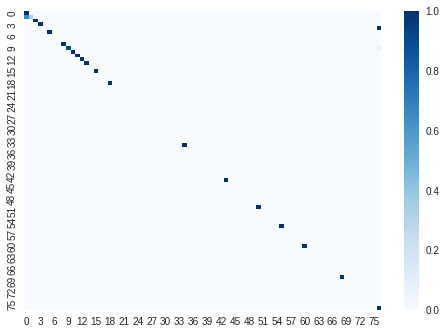

                            precision    recall  f1-score   support

                  sys_read       0.56      1.00      0.71         5
                 sys_write       0.17      0.33      0.22         6
                  sys_open       0.70      1.00      0.83        26
                 sys_close       0.50      1.00      0.67        27
               sys_newstat       0.00      0.00      0.00        20
              sys_newfstat       1.00      1.00      1.00        27
                  sys_poll       0.00      0.00      0.00         0
                 sys_lseek       0.00      0.00      0.00         0
                  sys_mmap       1.00      1.00      1.00        16
              sys_mprotect       1.00      0.92      0.96        12
                sys_munmap       1.00      1.00      1.00         1
                   sys_brk       0.75      1.00      0.86         3
          sys_rt_sigaction       0.29      1.00      0.44         2
        sys_rt_sigprocmask       0.07      1.00

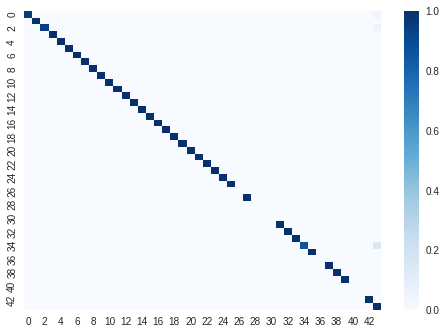

                    precision    recall  f1-score   support

          sys_read       1.00      0.95      0.98        22
         sys_write       1.00      1.00      1.00         3
          sys_open       1.00      0.94      0.97        18
         sys_close       1.00      1.00      1.00        26
       sys_newstat       0.38      1.00      0.55         3
      sys_newfstat       1.00      1.00      1.00        20
          sys_poll       1.00      1.00      1.00         5
          sys_mmap       1.00      1.00      1.00        24
      sys_mprotect       1.00      1.00      1.00        18
        sys_munmap       1.00      1.00      1.00         3
           sys_brk       1.00      1.00      1.00         3
  sys_rt_sigaction       1.00      1.00      1.00         3
sys_rt_sigprocmask       1.00      1.00      1.00         1
         sys_ioctl       1.00      1.00      1.00         5
        sys_access       1.00      1.00      1.00        10
     sys_setitimer       1.00      1.00

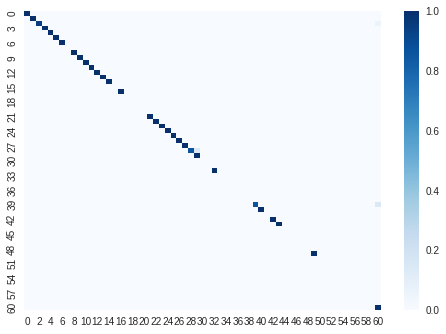

                            precision    recall  f1-score   support

                  sys_read       0.58      1.00      0.73        22
                 sys_write       1.00      1.00      1.00         3
                  sys_open       1.00      0.94      0.97        18
                 sys_close       0.84      1.00      0.91        26
               sys_newstat       1.00      1.00      1.00         3
              sys_newfstat       1.00      1.00      1.00        20
                  sys_poll       0.50      1.00      0.67         5
                 sys_lseek       0.00      0.00      0.00         0
                  sys_mmap       1.00      1.00      1.00        24
              sys_mprotect       1.00      1.00      1.00        18
                sys_munmap       1.00      1.00      1.00         3
                   sys_brk       0.75      1.00      0.86         3
          sys_rt_sigaction       1.00      1.00      1.00         3
        sys_rt_sigprocmask       0.25      1.00

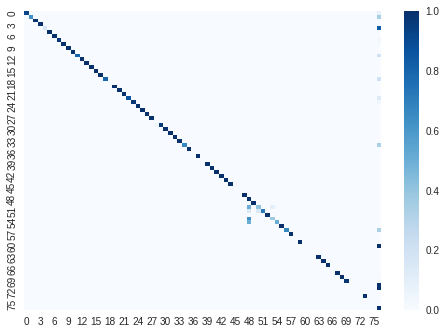

                            precision    recall  f1-score   support

                  sys_read       0.93      0.93      0.93       255
                 sys_write       0.63      0.63      0.63        49
                  sys_open       0.99      0.99      0.99       150
                 sys_close       1.00      1.00      1.00       225
               sys_newstat       1.00      0.17      0.29        18
              sys_newfstat       1.00      1.00      1.00       124
                  sys_poll       1.00      1.00      1.00        15
                 sys_lseek       1.00      0.97      0.98        33
                  sys_mmap       1.00      0.99      1.00       120
              sys_mprotect       1.00      1.00      1.00        84
                sys_munmap       1.00      1.00      1.00        19
                   sys_brk       1.00      0.80      0.89         5
          sys_rt_sigaction       1.00      1.00      1.00        35
        sys_rt_sigprocmask       1.00      1.00

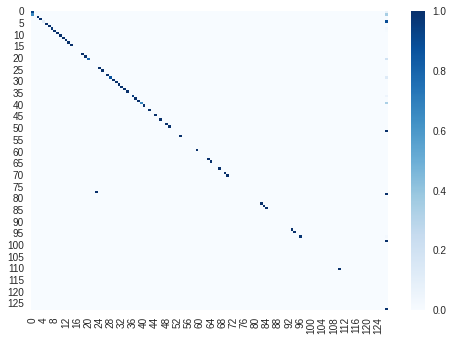

                            precision    recall  f1-score   support

                  sys_read       0.75      0.92      0.82       255
                 sys_write       0.00      0.00      0.00        49
                  sys_open       0.99      0.99      0.99       150
                 sys_close       0.57      1.00      0.72       225
               sys_newstat       1.00      0.11      0.20        18
              sys_newfstat       0.93      1.00      0.96       124
                  sys_poll       0.83      1.00      0.91        15
                 sys_lseek       0.02      0.97      0.04        33
                  sys_mmap       1.00      0.99      1.00       120
              sys_mprotect       1.00      1.00      1.00        84
                sys_munmap       1.00      1.00      1.00        19
                   sys_brk       0.14      1.00      0.24         5
          sys_rt_sigaction       0.57      1.00      0.73        35
        sys_rt_sigprocmask       0.55      1.00

................................................................................
KEY: ssh-keygen
[+] Loading Memory Access File ./data/memaccess_dumps/ssh-keygen_1_ta_1_ei_0_pr.dump
[+] do not decompress ./data/memaccess_dumps/ssh-keygen_1_ta_1_ei_0_pr.dump
[+] new index 0-121912
[+] sc table pa 18a00100
[+] text offset 800000
[+] Loading Annotation File: ./data/memaccess_dumps/ssh-keygen_1_ta_1_ei_0_pr.annotations
[+] Got 243 annotated features
********************************************************************************
BLR: 0, NFEAT: 128, pr, ssh-keygen
        :     BASE /     PRED
       0:       15 /       15     sys_read
       1:        3 /        3     sys_write
       2:       18 /       18     sys_open
       3:       20 /       20     sys_close
       4:        1 /        0 --- sys_newstat
       5:       17 /       17     sys_newfstat
       7:        1 /        1     sys_poll
       8:        2 /        2     sys_lseek
       9:       27 /       27     sys_mmap
      1

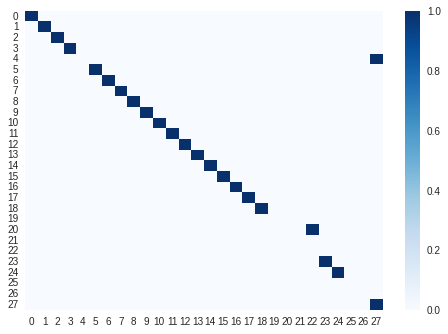

                precision    recall  f1-score   support

      sys_read       1.00      1.00      1.00        15
     sys_write       1.00      1.00      1.00         3
      sys_open       1.00      1.00      1.00        18
     sys_close       1.00      1.00      1.00        20
   sys_newstat       0.00      0.00      0.00         1
  sys_newfstat       1.00      1.00      1.00        17
      sys_poll       1.00      1.00      1.00         1
     sys_lseek       1.00      1.00      1.00         2
      sys_mmap       1.00      1.00      1.00        27
  sys_mprotect       1.00      1.00      1.00        18
    sys_munmap       1.00      1.00      1.00         4
       sys_brk       1.00      1.00      1.00         3
     sys_ioctl       1.00      1.00      1.00         1
    sys_access       1.00      1.00      1.00        10
    sys_getpid       1.00      1.00      1.00        94
    sys_socket       1.00      1.00      1.00         2
   sys_connect       1.00      1.00      1.00  

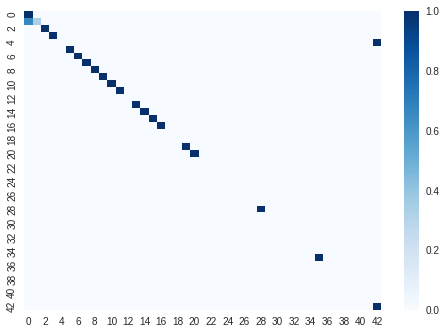

                            precision    recall  f1-score   support

                  sys_read       0.79      1.00      0.88        15
                 sys_write       0.08      0.33      0.13         3
                  sys_open       1.00      1.00      1.00        18
                 sys_close       0.62      1.00      0.77        20
               sys_newstat       0.00      0.00      0.00         1
              sys_newfstat       1.00      1.00      1.00        17
                  sys_poll       0.33      1.00      0.50         1
                 sys_lseek       0.20      1.00      0.33         2
                  sys_mmap       1.00      1.00      1.00        27
              sys_mprotect       1.00      1.00      1.00        18
                sys_munmap       1.00      1.00      1.00         4
                   sys_brk       0.75      1.00      0.86         3
          sys_rt_sigaction       0.00      0.00      0.00         0
                 sys_ioctl       1.00      1.00

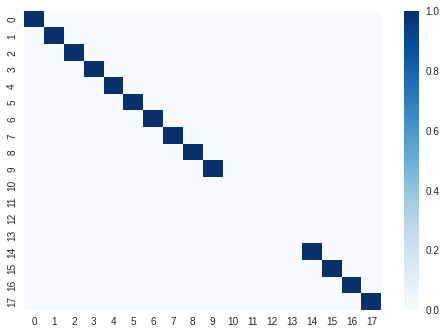

                 precision    recall  f1-score   support

       sys_read       1.00      1.00      1.00         2
      sys_write       1.00      1.00      1.00         5
       sys_open       1.00      1.00      1.00         3
      sys_close       1.00      1.00      1.00         4
   sys_newfstat       1.00      1.00      1.00         4
       sys_mmap       1.00      1.00      1.00         6
   sys_mprotect       1.00      1.00      1.00         4
     sys_munmap       1.00      1.00      1.00         1
        sys_brk       1.00      1.00      1.00         3
     sys_access       1.00      1.00      1.00         3
     sys_unlink       0.00      0.00      0.00         0
     sys_setuid       0.00      0.00      0.00         0
    sys_getppid       0.00      0.00      0.00         0
sys_personality       0.00      0.00      0.00         0
 sys_arch_prctl       1.00      1.00      1.00         1
  sys_fadvise64       1.00      1.00      1.00         1
 sys_exit_group       1.00    

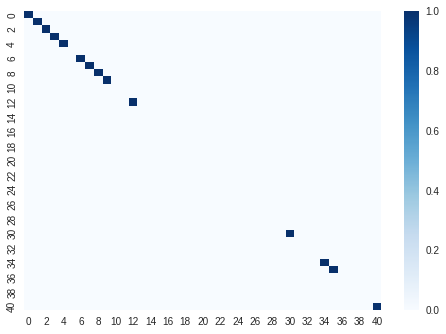

                            precision    recall  f1-score   support

                  sys_read       1.00      1.00      1.00         2
                 sys_write       1.00      1.00      1.00         5
                  sys_open       1.00      1.00      1.00         3
                 sys_close       0.67      1.00      0.80         4
              sys_newfstat       1.00      1.00      1.00         4
                 sys_lseek       0.00      0.00      0.00         0
                  sys_mmap       1.00      1.00      1.00         6
              sys_mprotect       1.00      1.00      1.00         4
                sys_munmap       1.00      1.00      1.00         1
                   sys_brk       0.75      1.00      0.86         3
                 sys_ioctl       0.00      0.00      0.00         0
              sys_pwrite64       0.00      0.00      0.00         0
                sys_access       0.38      1.00      0.55         3
                  sys_pipe       0.00      0.00

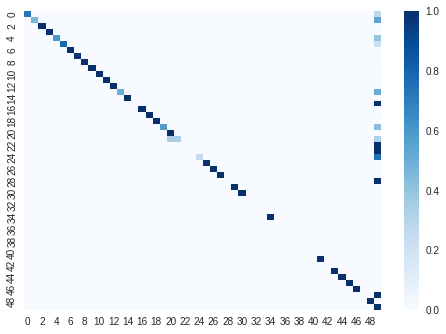

                            precision    recall  f1-score   support

                  sys_read       1.00      0.73      0.84        51
                 sys_write       1.00      0.46      0.63       441
                  sys_open       1.00      1.00      1.00        51
                 sys_close       1.00      1.00      1.00        54
               sys_newstat       1.00      0.60      0.75         5
              sys_newfstat       1.00      0.79      0.88        47
                  sys_poll       1.00      1.00      1.00        13
                  sys_mmap       1.00      0.98      0.99        92
              sys_mprotect       1.00      0.99      0.99        74
                sys_munmap       1.00      1.00      1.00         5
                   sys_brk       1.00      1.00      1.00         5
          sys_rt_sigaction       1.00      1.00      1.00        36
        sys_rt_sigprocmask       1.00      1.00      1.00         1
                 sys_ioctl       1.00      0.50

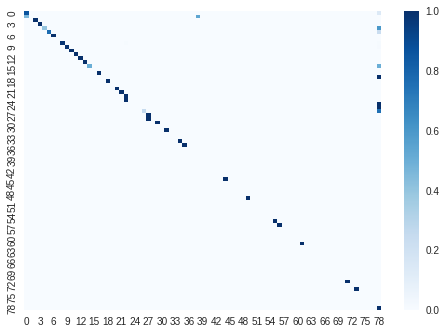

                            precision    recall  f1-score   support

                  sys_read       0.18      0.86      0.29        51
                 sys_write       1.00      0.00      0.00       441
                  sys_open       1.00      1.00      1.00        51
                 sys_close       0.68      1.00      0.81        54
               sys_newstat       1.00      0.40      0.57         5
              sys_newfstat       1.00      0.77      0.87        47
                  sys_poll       0.81      1.00      0.90        13
                 sys_lseek       0.00      0.00      0.00         0
                  sys_mmap       0.97      0.98      0.97        92
              sys_mprotect       1.00      0.99      0.99        74
                sys_munmap       1.00      1.00      1.00         5
                   sys_brk       0.33      1.00      0.50         5
          sys_rt_sigaction       0.88      1.00      0.94        36
        sys_rt_sigprocmask       0.11      1.00

In [9]:
for typ in typs:
    print("-" * 80)
    print("TYP: %s" % typ)
    for key in keys:
        print("." * 80)
        print("KEY: %s" % key)
        data_path = "./data/memaccess_dumps/%s_1_ta_1_ei_0_%s.dump" % (key, typ)
        anot_path = "./data/memaccess_dumps/%s_1_ta_1_ei_0_%s.annotations" % (key, typ)
        info_path = "./data/recordings/%s_1.info" % key
        mae = DataPrep.MaEval.MaEval(data_path, anot_path, info_path, scmap)
        for blur in blurs:
            if typ == "pr" and blur == 4:
                continue
            #for n_feat in n_feats:
            n_feat = n_feats[typ][blur]
            mkey = "%s_%d_%d_Random_Forrest.83ae2e226a1ed92ed757976cc8cbcc5f" % (typ, n_feat, blur)
            eval_fn = os.path.join("./eval_out", "%s_%s.eval" % (key, mkey))
            eval_loaded = False
            if os.path.exists(eval_fn):
                try:
                    eval_data = pickle.load(open(eval_fn, "rb"))
                    y_pred = eval_data['y_pred']
                    y_base = eval_data['y_base']
                    sc_count_pred = eval_data['sc_count_pred']
                    sc_count_base = eval_data['sc_count_base']
                    all_sc = eval_data['all_sc']
                    key2sc = eval_data['key2sc']
                    sc2key = eval_data['sc2key']
                    cf_matrix = eval_data['cf_matrix']
                    eval_loaded = True
                except:
                    pass
                #continue
            if not eval_loaded:
                mdl_base_path = os.path.join("fmod/%s/%d/%d" % (typ, blur, n_feat), mkey)
                print(mdl_base_path)
                y_pred, y_base, sc_count_pred, sc_count_base, all_sc, key2sc, sc2key = \
                    mae.do_predict(n_feat, blur, mdl_base_path, step=step)
                eval_data = {
                    "sc2key": sc2key,
                    "key2sc": key2sc,
                    "blur": blur,
                    "n_feat": n_feat,
                    "typ": typ,
                    "mkey": mkey,
                    "key": key,
                    "y_base": y_base,
                    "y_pred": y_pred,
                    #"cf_matrix": cf_matrix,
                    "sc_count_pred": sc_count_pred,
                    "sc_count_base": sc_count_base,
                    "all_sc": all_sc,
                }
                pickle.dump(eval_data, open(eval_fn, "wb"))
            target_names = []
            sc_sorted = list(all_sc)
            y_base = filter_ys(y_base, sc_filter[typ][blur], scmap, key2sc, sc2key)
            y_pred = filter_ys(y_pred, sc_filter[typ][blur], scmap, key2sc, sc2key)
            #sc_sorted = filter_ys(sc_sorted, sc_filter[typ][blur], scmap, key2sc)
            sc_sorted.sort()
            keys_sorted = []
            for sc in sc_sorted:
                target_names.append(scmap[sc])
                sc_excluded = scmap[sc] in sc_filter[typ][blur]
                #if typ == "pw":
                #    sc_excluded = sc in ex_pw_id
                #if typ == "pr":
                #    sc_excluded = sc in ex_pr_id
                if sc != 0xffff and not sc_excluded:
                    keys_sorted.append(sc2key[sc])
            keys_sorted_nosc = keys_sorted[:]
            keys_sorted_nosc.append(sc2key[0xffff])
            sc_count_pred = filter_count(sc_count_pred, sc_filter[typ][blur], scmap)
            sc_count_base = filter_count(sc_count_base, sc_filter[typ][blur], scmap)
            eval_data['sc_count_pred'] = sc_count_pred
            eval_data['sc_count_base'] = sc_count_base
            print("*" * 80)
            print("BLR: %d, NFEAT: %d, %s, %s" % (blur, n_feat, typ, key))
            mae.print_numdiff(sc_count_pred, sc_count_base, all_sc)
            cf_matrix = confusion_matrix(y_base, y_pred, normalize='true')
            eval_data['cf_matrix'] = cf_matrix
            sns.heatmap(cf_matrix, annot=False, cmap='Blues')
            plt.show()
            print(classification_report(y_base, y_pred, target_names=target_names, labels=keys_sorted))
            eval_data['class_rep'] = classification_report(y_base, y_pred, target_names=target_names, labels=keys_sorted, output_dict=True)
            pickle.dump(eval_data, open(eval_fn, "wb"))